# Лабораторная работа №3. Синтез БИХ-фильтров.
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ
# Модуль 1. Метод размещения нулей и полюсов.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Пример биквадратнорго блока (рекурсивный фильтр второго порядка).

Рассмотрим фильтр с разностным уравнением

$$x[k]+2x[k-1]+x[k-2]=y[k]-\frac{3}{2}y[k-1]+\frac{1}{2}y[k-2],\ y[-1]=y[-2]=0.$$

Для физически реализуемой дискретной LTI–системы разностное уравнение может быть записано в виде 
$$\sum\limits_{m=0}^{M-1}{{{\alpha }_{m}}}y[k-m]=\sum\limits_{m=0}^{N-1}{{{\beta }_{m}}}x[k-m],$$
где $\alpha_m$ и $\beta_m$ – заданные коэффициенты, $M$ и $N$ – натуральные числа. Как правило, полагают ${{\alpha }_{0}}=1$.


 В данном случае $\alpha_0=1$, $\alpha_1=-1.5$, $\alpha_2=0.5$ и  $\beta_0=1$, $\beta_1=2$, $\beta_2=1$.

### Импульсная характеристика

Вычислим импульсную характеристику такого фильтра c помощью моделирования. 

Воспользуемся функцией  [```signal.lfilter```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)

In [3]:
alpha=np.array([1, -1.5, 0.5])
beta=np.array([1, 2, 1])
N=50
x=np.zeros(N)
x[0]=1
y=signal.lfilter(b=beta, a=alpha, x=x)
y

array([1.        , 3.5       , 5.75      , 6.875     , 7.4375    ,
       7.71875   , 7.859375  , 7.9296875 , 7.96484375, 7.98242188,
       7.99121094, 7.99560547, 7.99780273, 7.99890137, 7.99945068,
       7.99972534, 7.99986267, 7.99993134, 7.99996567, 7.99998283,
       7.99999142, 7.99999571, 7.99999785, 7.99999893, 7.99999946,
       7.99999973, 7.99999987, 7.99999993, 7.99999997, 7.99999998,
       7.99999999, 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ])

На лекции мы получили следущий результат 
$$h\left[ k \right]=2\cdot \mathbf{1}\left[ k \right]-9\cdot {{0,5}^{k}}u\left[ k \right]+8u\left[ k \right].$$

In [5]:
signal.unit_impulse(N)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
k=np.arange(N)
h=2*signal.unit_impulse(N)-9*0.5**k+8
h

array([1.        , 3.5       , 5.75      , 6.875     , 7.4375    ,
       7.71875   , 7.859375  , 7.9296875 , 7.96484375, 7.98242188,
       7.99121094, 7.99560547, 7.99780273, 7.99890137, 7.99945068,
       7.99972534, 7.99986267, 7.99993134, 7.99996567, 7.99998283,
       7.99999142, 7.99999571, 7.99999785, 7.99999893, 7.99999946,
       7.99999973, 7.99999987, 7.99999993, 7.99999997, 7.99999998,
       7.99999999, 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ])

In [9]:
print("%.18f" % max(abs(h-y)))

0.000000000000000000


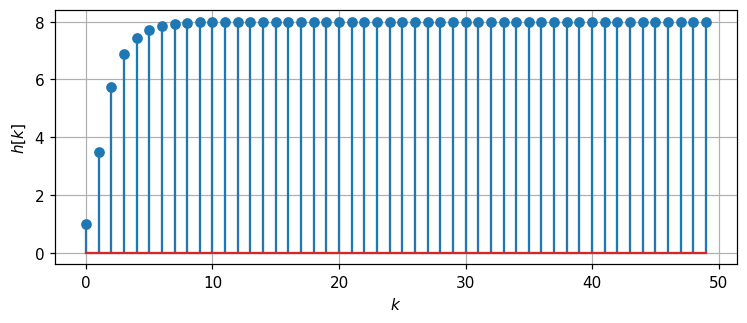

In [11]:
plt.figure(figsize=[8, 3], dpi=110)
plt.stem(k, h)
plt.xlabel("$k$")
plt.ylabel("$h[k]$")
plt.grid()
plt.show()

## Нуль-полюсная диаграмма

Передаточная функция  такого фильтра
$$H\left( z \right)=\frac{1+2{{z}^{-1}}+{{z}^{-2}}}{1-\frac{3}{2}{{z}^{-1}}+\frac{1}{2}{{z}^{-2}}}=\frac{{{\left( 1+{{z}^{-1}} \right)}^{2}}}{\left( 1-\frac{1}{2}{{z}^{-1}} \right)\left( 1-{{z}^{-1}} \right)}=\frac{{{\left( 1-{{z}_{n1}}{{z}^{-1}} \right)}^{2}}}{\left( 1-{{z}_{p1}}{{z}^{-1}} \right)\left( 1-{{z}_{p2}}{{z}^{-1}} \right)}\cdot $$


In [12]:
alpha=np.array([1, -1.5, 0.5])
beta=np.array([1, 2, 1])
z, p, k = signal.tf2zpk(b=beta, a=alpha)
print("z = ", z)
print("p = ", p)
print("k = ", k)

z =  [-1. -1.]
p =  [1.  0.5]
k =  1.0


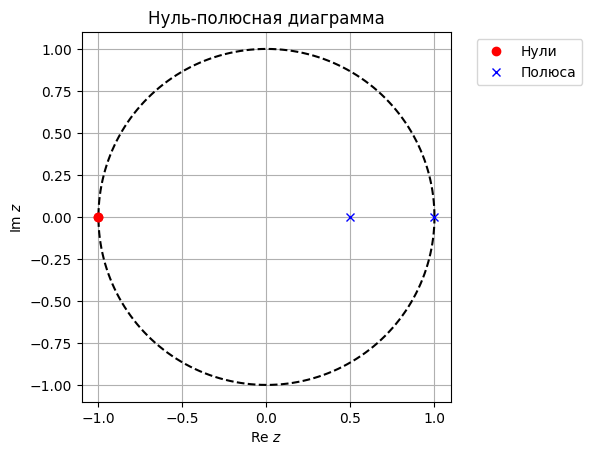

In [13]:
q = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(q), np.sin(q), 'k--')  

plt.plot(z.real, z.imag, 'ro', label='Нули')
plt.plot(p.real, p.imag, 'bx', label='Полюса')
plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")
plt.xlabel("Re $z$")
plt.ylabel("Im $z$")
plt.show()

Выполним обратное преобразование -- получим $\alpha_i$ и $\beta_i$ из представления передаточной функции в виде нулей и полюсов.

In [14]:
print("z = ", z)
print("p = ", p)
print("k = ", k)
signal.zpk2tf(z, p, k)

z =  [-1. -1.]
p =  [1.  0.5]
k =  1.0


(array([1., 2., 1.]), array([ 1. , -1.5,  0.5]))

In [15]:
beta, alpha

(array([1, 2, 1]), array([ 1. , -1.5,  0.5]))

## Пример фильтра нижних частот первого порядка.

Фильтр задан передаточной функцией
$$H(z)=\frac{5+5{{z}^{-1}}}{1-0,5{{z}^{-1}}}=\frac{5(z+1)}{z-0,5}.$$

Воспользуемся для задания системы базовым классом [```signal.dlti```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.html#scipy.signal.dlti)

In [16]:
z=[-1]
p=[0.5]
k=5
system=signal.dlti(z, p, k, dt=1)
system

ZerosPolesGainDiscrete(
array([-1]),
array([0.5]),
5,
dt: 1
)

In [17]:
signal.TransferFunction(system)

TransferFunctionDiscrete(
array([5., 5.]),
array([ 1. , -0.5]),
dt: 1
)

In [18]:
beta=[5., 5.]
alpha=[ 1. , -0.5]
signal.dlti(beta, alpha, dt=1)

TransferFunctionDiscrete(
array([5., 5.]),
array([ 1. , -0.5]),
dt: 1
)

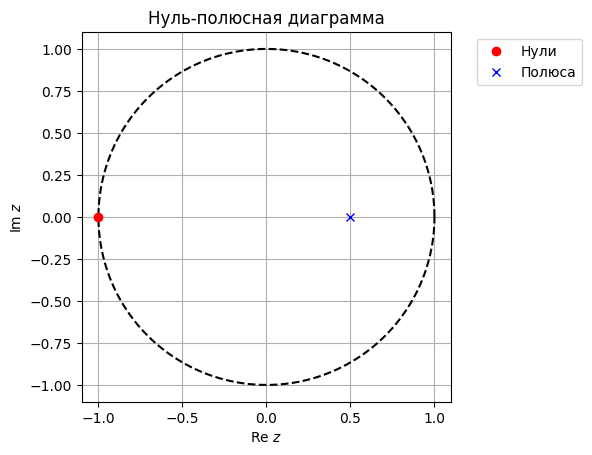

In [19]:
q = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(q), np.sin(q), 'k--')  
z, p, k = signal.tf2zpk(beta, alpha)
plt.plot(z.real, z.imag, 'ro', label='Нули')
plt.plot(p.real, p.imag, 'bx', label='Полюса')
plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")
plt.xlabel("Re $z$")
plt.ylabel("Im $z$")
plt.show()

### АЧХ



Частотную характеристику системы вычислим с помощью  [```signal.dfreqresp```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dfreqresp.html#scipy.signal.dfreqresp)

In [20]:
w, H = signal.dfreqresp(system, w=np.linspace(-np.pi, np.pi, 1024))

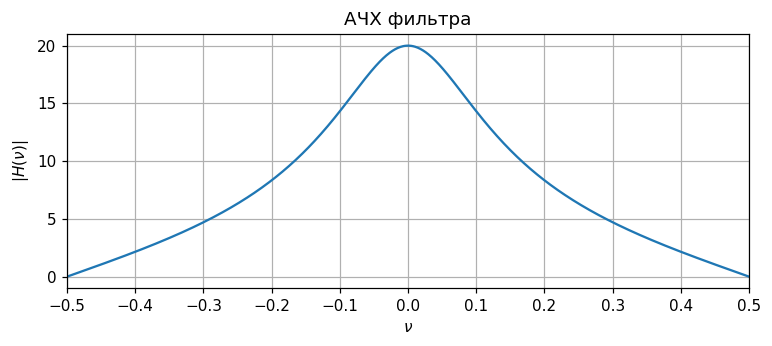

In [21]:
plt.figure(figsize=[8, 3], dpi=110)
plt.plot(w/(2*np.pi), abs(H))
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.title("АЧХ фильтра")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.show()

In [22]:
1/6

0.16666666666666666

На лекции получили, что при $\nu_0=\dfrac{1}{6}$  АЧХ $|H(\nu_0)|=10$.

In [23]:
w, H =signal.dfreqresp(system, w=[2*np.pi/6])
abs(H)

array([10.])

$$H(z)=\frac{5+5{{z}^{-1}}}{1-0,5{{z}^{-1}}}=\frac{5(z+1)}{z-0,5}.$$

$z=\exp(j2\pi\nu)$

In [24]:
nu=np.linspace(-0.5, 0.5, 1024)
z=np.exp(1j*2*np.pi*nu)
H=5*(z+1)/(z-0.5)

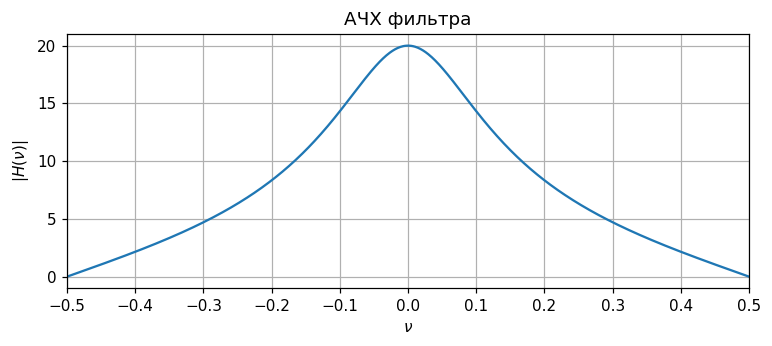

In [25]:
plt.figure(figsize=[8, 3], dpi=110)
plt.plot(nu, abs(H))
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.title("АЧХ фильтра")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.show()

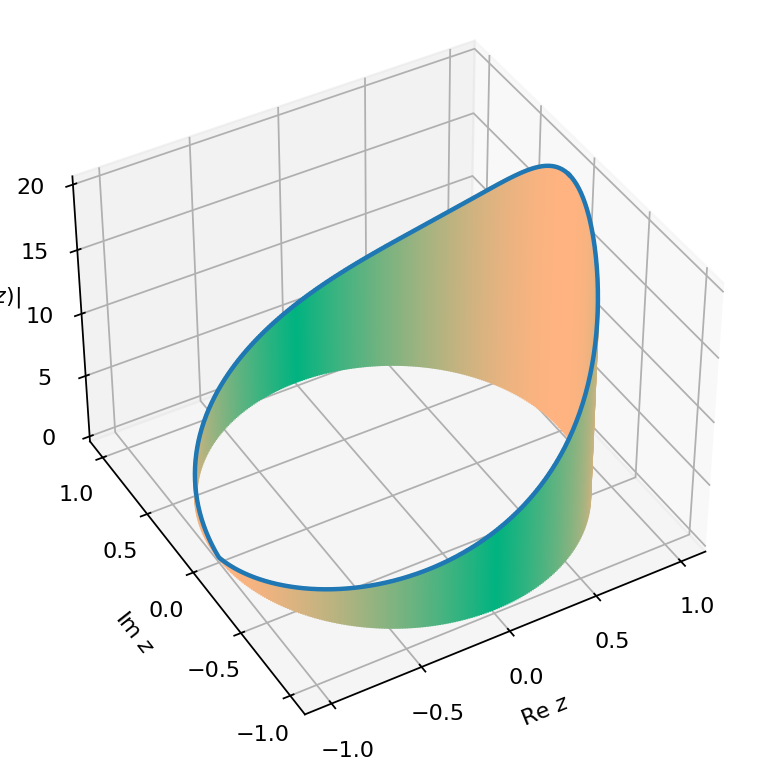

In [26]:
fig = plt.figure(dpi=160)
ax = plt.axes(projection='3d')
Re=np.arange(-1, 1, 0.01)
Im=np.arange(-1, 1, 0.01)
Re, Im = np.meshgrid(Re, Im)
phi=np.linspace(0, 2*np.pi, 500)
for u in phi:
    Z1=np.exp(-1j*u)
    Z2=abs(5*(Z1+1)/(Z1-0.5))
    ax.plot([Z1.real, Z1.real], [Z1.imag, Z1.imag], [0.0, Z2],  color=(abs(np.cos(u)), 0.7, 0.5))


Z1=np.exp(-1j*phi)
Z2=abs(5*(Z1+1)/(Z1-0.5))

ax.plot(Z1.real, Z1.imag, Z2, linewidth=2)

ax.set_zlim(0,20.2)
ax.set_xticks(np.linspace(-1, 1, 5))
ax.set_yticks(np.linspace(-1, 1, 5))
ax.set_zticks(np.linspace(0, 20, 5))
ax.view_init(40, 240)
ax.set_xlabel("Re $z$")
ax.set_ylabel("Im $z$")

ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel("$|H(z)|$", rotation=0)
plt.tight_layout()

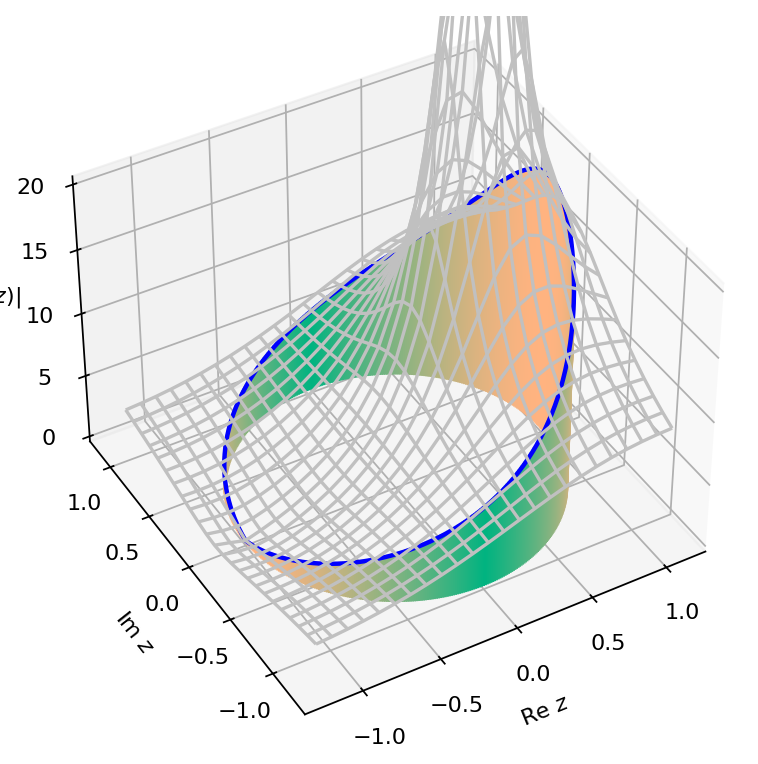

In [27]:
fig = plt.figure(dpi=160)
ax = plt.axes(projection='3d')
Re=np.arange(-1.2, 1.2, 0.1)
Im=np.arange(-1.2, 1.2, 0.1)
Re, Im = np.meshgrid(Re, Im)
Z1=(Re+1j*Im)
Z=abs(5*(Z1+1)/(Z1-0.5))
Z=np.minimum(Z, 40*np.ones(Z.shape))


phi=np.linspace(0, 2*np.pi, 500)
#ax.plot_surface(Re, Im, Z, linewidth=0, antialiased=True, color='silver')
ax.plot_wireframe(Re, Im, Z, color='silver')

for u in phi:
    Z1=np.exp(-1j*u)
    Z2=abs(5*(Z1+1)/(Z1-0.5))
    ax.plot([Z1.real, Z1.real], [Z1.imag, Z1.imag], [0.0, Z2],  color=(abs(np.cos(u)), 0.7, 0.5))


Z1=np.exp(-1j*phi)
Z2=abs(5*(Z1+1)/(Z1-0.5))

ax.plot(Z1.real, Z1.imag, Z2, linewidth=2, color='b')

ax.set_zlim(0,20.2)
ax.set_xticks(np.linspace(-1, 1, 5))
ax.set_yticks(np.linspace(-1, 1, 5))
ax.set_zticks(np.linspace(0, 20, 5))
ax.view_init(40, 240)
ax.set_xlabel("Re $z$")
ax.set_ylabel("Im $z$")

ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel("$|H(z)|$", rotation=0)
plt.tight_layout()

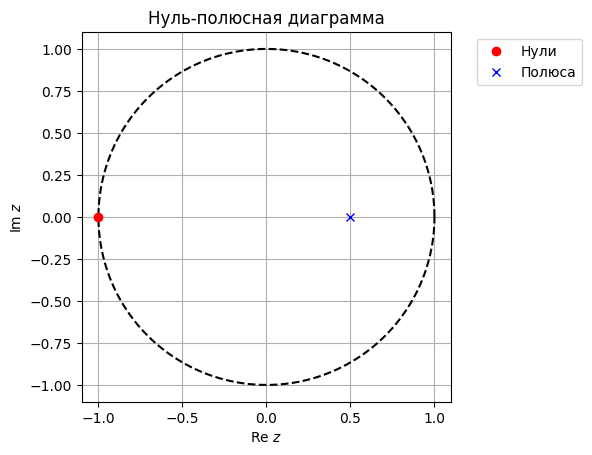

In [28]:
q = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(q), np.sin(q), 'k--')  
z, p, k = signal.tf2zpk(beta, alpha)
plt.plot(z.real, z.imag, 'ro', label='Нули')
plt.plot(p.real, p.imag, 'bx', label='Полюса')
plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")
plt.xlabel("Re $z$")
plt.ylabel("Im $z$")
plt.show()

### ФЧХ

На лекции получили, что при $\nu_0=\dfrac{1}{6}$  ФЧХ $\varphi(\nu_0)=- \dfrac{\pi}{3}$.

In [29]:
w, H =signal.dfreqresp(system, w=[2*np.pi/6])
np.angle(H)

array([-1.04719755])

In [30]:
np.angle(H)/np.pi

array([-0.33333333])

In [31]:
theta=np.linspace(-np.pi, np.pi, 1024)
theta, H =signal.dfreqresp(system, w=theta)

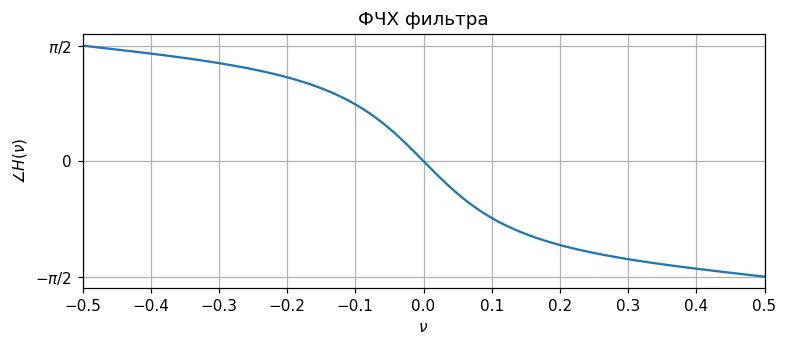

In [32]:
plt.figure(figsize=[8, 3], dpi=110)
plt.plot(theta/(2*np.pi), np.angle(H))
plt.xlabel("$\\nu$")
plt.ylabel("$\\angle H(\\nu)$")
plt.title("ФЧХ фильтра")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.yticks([-np.pi/2, 0, np.pi/2], labels=("$-\\pi/2$", "0", "$\\pi/2$"))

plt.grid()
plt.show()

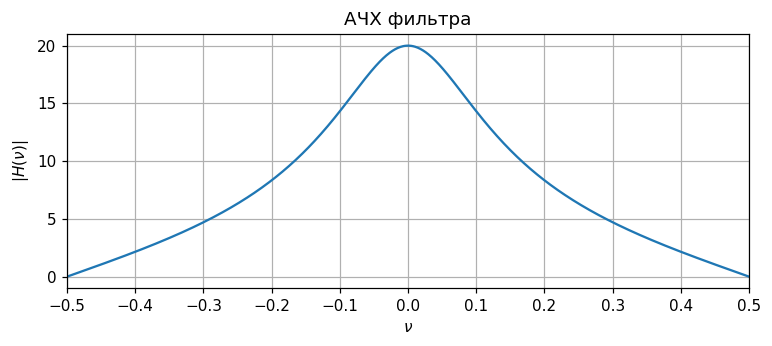

In [33]:
plt.figure(figsize=[8, 3], dpi=110)
plt.plot(theta/(2*np.pi), abs(H))
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.title("АЧХ фильтра")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.show()

## Импульсная и переходная характеристики 

Переходная характеристика $g[k]$ — реакция системы на функцию включения $u[k]$.

Импульсная характеристика $h[k]$ — реакция системы на единичный импульс $\mathbf1[k]$.

$$H(z)=\frac{5+5{{z}^{-1}}}{1-0,5{{z}^{-1}}}=\frac{5(z+1)}{z-0,5}.$$

$$G(z)=H(z)U(z)$$

$$U(z)=\dfrac{1}{1-z^{-1}}$$

$$G(z)=\frac{5+5{{z}^{-1}}}{(1-0,5{{z}^{-1}})(1-z^{-1})} = \frac{5(z+1)z}{(z-0,5)(z-1)} $$

По формуле обратного  z–преобразования 
$$g\left[ k \right]=\dfrac{1}{j2\pi }\,\oint\limits_{C}{Y\left( z \right)}{{z}^{k-1}}dz,$$
где контур  $C$ охватывает все полюса подынтегральной функции.  


$$Q(z) = \frac{5(z+1)z^k}{(z-0,5)(z-1)} $$

---


По теореме Коши о вычетах 

$$g\left[ k \right]=\frac{1}{j2\pi }\,\oint\limits_{C}{Q\left( z \right)}dz=\sum\limits_{p}{\underset{{{z}_{p}}}{\mathop{\text{Res}}}\,\text{ }Q(z)},\text{   }k\ge 0$$
где $z_p$– полюса функции $Q(z)$.  

Для нахождения вычетов используются следующие формулы:

•	  в случае простого (однократного) полюса, т. е. полюса первого порядка,
$$\underset{{{z}_{p}}}{\mathop{\text{Res}}}\,\text{ }Q(z)=\underset{z\to {{z}_{p}}}{\mathop{\lim }}\,Q(z)(z-{{z}_{p}});$$
•	в случае m-кратного полюса, т. е. полюса m-го порядка,
	$$\underset{{{z}_{p}}}{\mathop{\text{Res}}}\,\text{ }Q(z)=\frac{1}{(m-1)!}\text{ }\underset{z\to {{z}_{p}}}{\mathop{\lim }}\,\text{ }\frac{{{d}^{m-1}}}{d{{z}^{m-1}}}\left[ Q(z){{(z-{{z}_{p}})}^{m}} \right].$$



---




В нашем случае у подынтегральной функции два полюса первого порядка. 

$$g\left[ k \right]=\dfrac{1}{j2\pi }\,\oint\limits_{C}{Y\left( z \right)}{{z}^{k-1}}dz= \dfrac{1}{j2\pi }\,\oint\limits_{C} Q(z)dz = \dfrac{1}{j2\pi }\,\oint\limits_{C} \frac{5(z+1)z^k}{(z-0,5)(z-1)} dz = $$

$$= \underset{{0,5}}{\mathop{\text{Res}}} \, Q(z) + \underset{{1}}{\mathop{\text{Res}}} \, Q(z) = \underset{z\to 0,5}{\mathop{\lim }} \frac{5(z+1)z^k}{(z-1)} + \underset{z\to 1}{\mathop{\lim }} \frac{5(z+1)z^k}{(z-0,5)} = -15 \times 0,5^k+20, \;\; k\ge0$$

$$g[k]=(-15 \times 0,5^k+20) u[k]$$


[```signal.dimpulse```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dimpulse.html#scipy.signal.dimpulse)

[```signal.dstep```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dstep.html#scipy.signal.dstep)


In [34]:
k=np.arange(25)
y1=-15*0.5**k+20

In [35]:
t, y = signal.dstep(system, n=25)
y

(array([[ 5.        ],
        [12.5       ],
        [16.25      ],
        [18.125     ],
        [19.0625    ],
        [19.53125   ],
        [19.765625  ],
        [19.8828125 ],
        [19.94140625],
        [19.97070312],
        [19.98535156],
        [19.99267578],
        [19.99633789],
        [19.99816895],
        [19.99908447],
        [19.99954224],
        [19.99977112],
        [19.99988556],
        [19.99994278],
        [19.99997139],
        [19.99998569],
        [19.99999285],
        [19.99999642],
        [19.99999821],
        [19.99999911]]),)

In [36]:
print("%.16f" % max(abs(y1-np.squeeze(y))))

0.0000000000000000


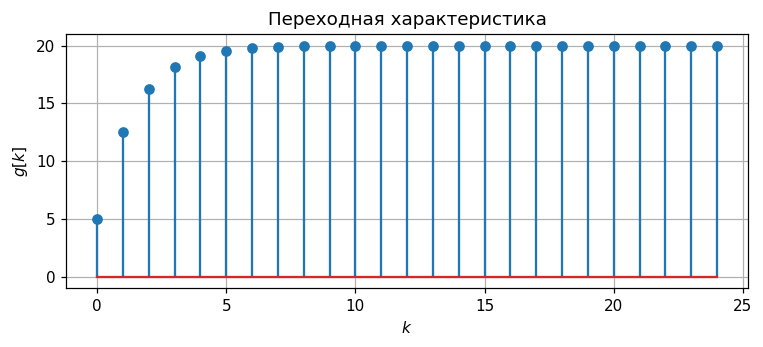

In [39]:
plt.figure(figsize=[8, 3], dpi=110)
plt.stem(t, np.squeeze(y))
plt.xlabel("$k$")
plt.ylabel("$g[k]$")
plt.title("Переходная характеристика")
plt.grid()
plt.show()

$$H(z)=\frac{5+5{{z}^{-1}}}{1-0,5{{z}^{-1}}}=\frac{5(z+1)}{z-0,5}.$$


По формуле обратного  z–преобразования 
$$h\left[ k \right]=\dfrac{1}{j2\pi }\,\oint\limits_{C}{H\left( z \right)}{{z}^{k-1}}dz,$$
где контур  $C$ охватывает все полюса подынтегральной функции. 

$$R(z) = \frac{5(z+1)z^{k-1}}{(z-0,5)} $$

В нашем случае у подынтегральной функции один полюс первого порядка при $k-1\ge0$

$$h\left[ k \right]=\dfrac{1}{j2\pi }\,\oint\limits_{C}{H\left( z \right)}{{z}^{k-1}}dz= \dfrac{1}{j2\pi }\,\oint\limits_{C} R(z)dz = \dfrac{1}{j2\pi }\,\oint\limits_{C} \frac{5(z+1)z^{k-1}}{(z-0,5)} dz = $$

$$= \underset{{0,5}}{\mathop{\text{Res}}} \, Q(z) = \underset{z\to 0,5}{\mathop{\lim }} \frac{5(z+1)z^{k-1}(z-0,5)}{(z-0,5)}  = 7,5 \cdot 0,5^{k-1}, \;\; k\ge1$$

$$h\left[ 0 \right]=\dfrac{1}{j2\pi }\,\oint\limits_{C}{H\left( z \right)}{{z}^{-1}}dz = \dfrac{1}{j2\pi }\,\oint\limits_{C} \frac{5(z+1)}{(z-0,5)z} dz = $$

$$= \underset{{0,5}}{\mathop{\text{Res}}} \, Q(z) + \underset{{0}}{\mathop{\text{Res}}} \, Q(z)= \underset{z\to 0,5}{\mathop{\lim }} \frac{5(z+1)(z-0,5)}{(z-0,5)z}  + \underset{z\to 0}{\mathop{\lim }} \frac{5(z+1)z}{(z-0,5)z}  = 5.$$

$$h[k]=7.5 \cdot 0,5^{k-1}u[k] - 10 \cdot\mathbf1[k]$$

In [40]:
k=np.arange(-1, 24, 1)
h1=7.5*0.5**(k)-10*signal.unit_impulse(25)

In [41]:
t, h = signal.dimpulse(system, n=25)

In [42]:
print("%.16f" % max(abs(h1-np.squeeze(h))))

0.0000000000000000


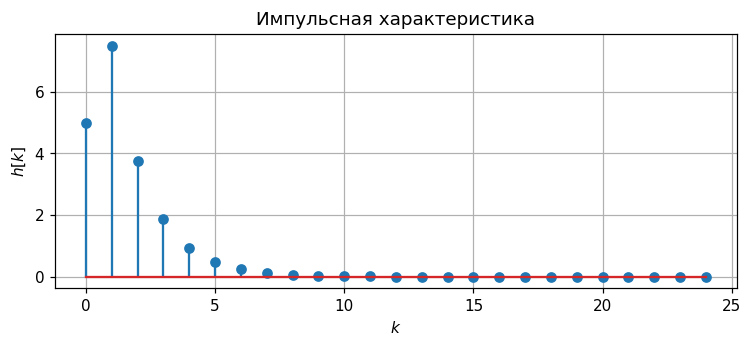

In [43]:
plt.figure(figsize=[8, 3], dpi=110)
plt.stem(t, np.squeeze(h))
plt.xlabel("$k$")
plt.ylabel("$h[k]$")
plt.title("Импульсная характеристика")
plt.grid()
plt.show()

## Фильтр Hum removal

$$H(z)={{G}_{0}}\frac{\left( 1-\exp (j{{\theta }_{0}}){{z}^{-1}} \right)\left( 1-\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)}{\left( 1-A\exp (j{{\theta }_{0}}){{z}^{-1}} \right)\left( 1-A\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)}$$

In [44]:
theta_0=np.pi/4
A=0.9

In [45]:
z=np.array([np.exp(1j*theta_0), np.exp(-1j*theta_0)])
p=np.array([A*np.exp(1j*theta_0), A*np.exp(-1j*theta_0)])
k=1

In [46]:
Hum_removal=signal.dlti(z,p,k, dt=1)
Hum_removal

ZerosPolesGainDiscrete(
array([0.70710678+0.70710678j, 0.70710678-0.70710678j]),
array([0.6363961+0.6363961j, 0.6363961-0.6363961j]),
1,
dt: 1
)

In [47]:
w, H = signal.dfreqresp(Hum_removal, w=2*np.pi*np.linspace(-0.5, 0.5, 1024))

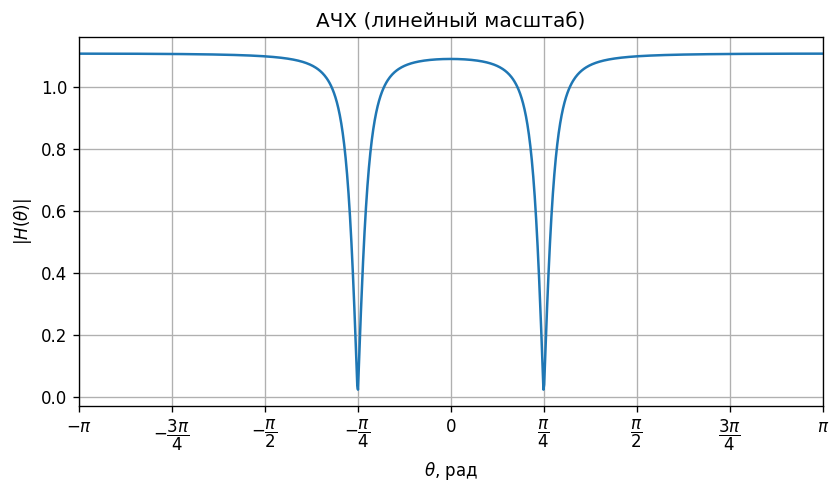

In [48]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(w, abs(H))
plt.xlabel("$\\theta$, рад")
plt.ylabel("$|H(\\theta)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, np.pi])

str1=["$-\\pi$",
     "$-\dfrac{3\\pi}{4}$",
     "$-\dfrac{\\pi}{2}$",
     "$-\dfrac{\\pi}{4}$",
     "$0$",
     "$\dfrac{\\pi}{4}$",
     "$\dfrac{\\pi}{2}$",
     "$\dfrac{3\\pi}{4}$",
     "$\\pi$"]
plt.xticks(2*np.pi*np.linspace(-0.5, 0.5, 9), labels=str1)
plt.grid()
# plt.savefig("hum_removal_Am_resp.svg")

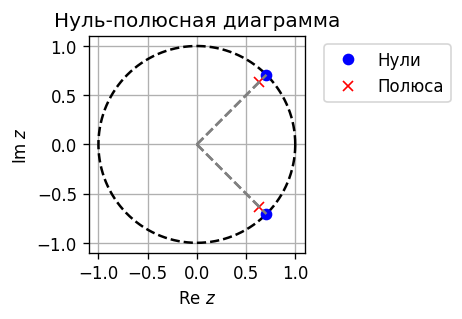

In [49]:
plt.figure(figsize=[4, 4], dpi=120)
# unit circle
t = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(t), np.sin(t), 'k--')  

plt.plot(z.real, z.imag, 'bo', label='Нули')
plt.plot(p.real, p.imag, 'rx', label='Полюса')

for u in z:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

for u in p:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

plt.yticks(np.linspace(-1, 1, 5))
plt.xticks(np.linspace(-1, 1, 5))

plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")

plt.xlabel("Re $z$")
plt.ylabel("Im $z$")

plt.tight_layout()
# plt.savefig("hum_removal_zpk.svg")

# iirnotch(w0, Q[, fs]), iirpeak(w0, Q[, fs])

iirnotch(w0, Q[, fs])

Design second-order IIR notch digital filter.

iirpeak(w0, Q[, fs])

Design second-order IIR peak (resonant) digital filter

In [50]:
theta_0=np.pi/4
f_0=theta_0/(2*np.pi)

In [51]:
beta, alpha = signal.iirnotch(f_0, Q=5, fs=1)
dlti_hr=signal.dlti(beta, alpha, dt=1)

In [52]:
w, H = signal.dfreqresp(dlti_hr, w=2*np.pi*np.linspace(-0.5, 0.5, 1024))

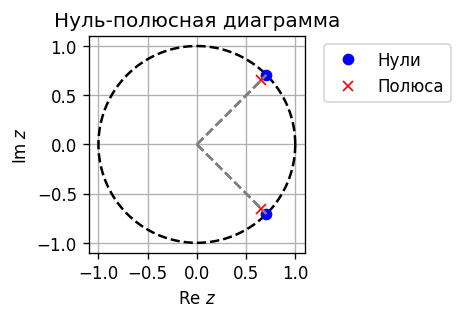

In [53]:
#@title Нуль-полюсная диаграмма
z, p, k = signal.tf2zpk(beta, alpha)

plt.figure(figsize=[4, 4], dpi=120)
# unit circle
t = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(t), np.sin(t), 'k--')  

plt.plot(z.real, z.imag, 'bo', label='Нули')
plt.plot(p.real, p.imag, 'rx', label='Полюса')

for u in z:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

for u in p:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

plt.yticks(np.linspace(-1, 1, 5))
plt.xticks(np.linspace(-1, 1, 5))

plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")

plt.xlabel("Re $z$")
plt.ylabel("Im $z$")

plt.tight_layout()


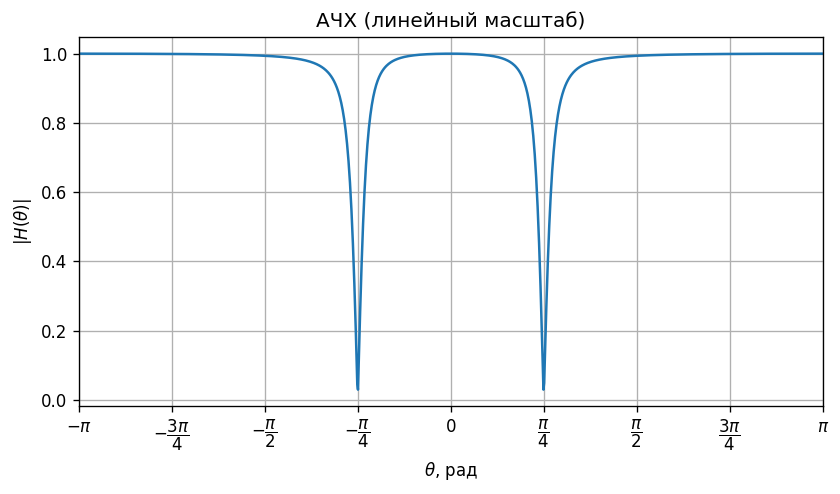

In [54]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(w, abs(H))
plt.xlabel("$\\theta$, рад")
plt.ylabel("$|H(\\theta)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, np.pi])

str1=["$-\\pi$",
     "$-\dfrac{3\\pi}{4}$",
     "$-\dfrac{\\pi}{2}$",
     "$-\dfrac{\\pi}{4}$",
     "$0$",
     "$\dfrac{\\pi}{4}$",
     "$\dfrac{\\pi}{2}$",
     "$\dfrac{3\\pi}{4}$",
     "$\\pi$"]
plt.xticks(2*np.pi*np.linspace(-0.5, 0.5, 9), labels=str1)
plt.grid()
# plt.savefig("hum_removal_Am_resp.svg")

In [55]:
beta, alpha = signal.iirpeak(f_0, Q=5, fs=1)
dlti_rs=signal.dlti(beta, alpha, dt=1)
w, H = signal.dfreqresp(dlti_rs, w=2*np.pi*np.linspace(-0.5, 0.5, 1024))

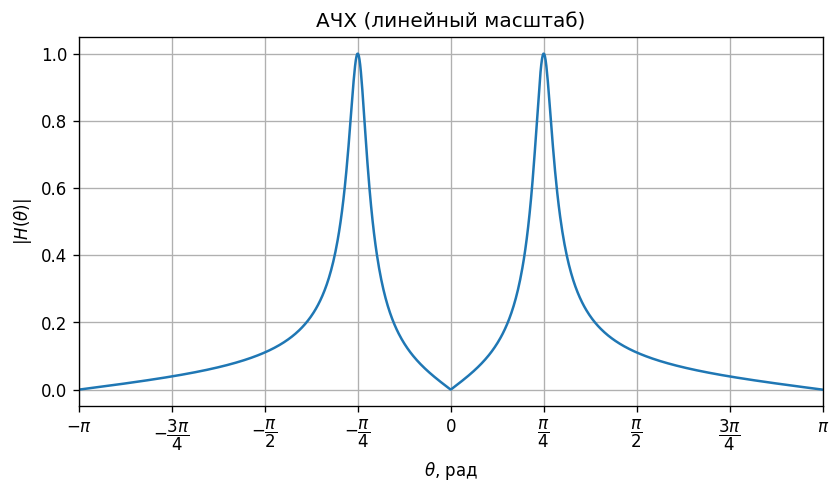

In [56]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(w, abs(H))
plt.xlabel("$\\theta$, рад")
plt.ylabel("$|H(\\theta)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, np.pi])

str1=["$-\\pi$",
     "$-\dfrac{3\\pi}{4}$",
     "$-\dfrac{\\pi}{2}$",
     "$-\dfrac{\\pi}{4}$",
     "$0$",
     "$\dfrac{\\pi}{4}$",
     "$\dfrac{\\pi}{2}$",
     "$\dfrac{3\\pi}{4}$",
     "$\\pi$"]
plt.xticks(2*np.pi*np.linspace(-0.5, 0.5, 9), labels=str1)
plt.grid()

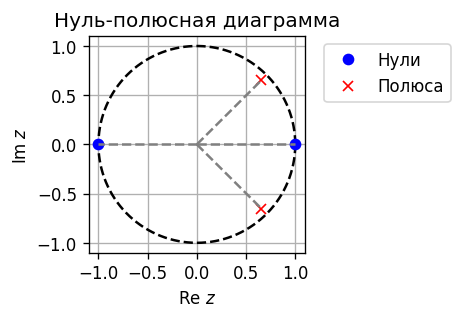

In [57]:
#@title Нуль-полюсная диаграмма
z, p, k = signal.tf2zpk(beta, alpha)

plt.figure(figsize=[4, 4], dpi=120)
# unit circle
t = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(t), np.sin(t), 'k--')  

plt.plot(z.real, z.imag, 'bo', label='Нули')
plt.plot(p.real, p.imag, 'rx', label='Полюса')

for u in z:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

for u in p:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

plt.yticks(np.linspace(-1, 1, 5))
plt.xticks(np.linspace(-1, 1, 5))

plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")

plt.xlabel("Re $z$")
plt.ylabel("Im $z$")

plt.tight_layout()